In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
data = pd.read_csv('/content/drive/My Drive/Projects/task5/social influence on shopping.csv')

In [52]:
# Display basic information about the dataset
print(data.shape)
data.head()

(1450, 7)


,index,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,4,What social platform has influenced your onlin...,Mobile,Global results,None,947,0.354


In [53]:
data.describe()

,index,Count,Percentage
count,1450.000000,1450.000000,1450.000000
mean,724.500000,35.013793,0.199313
std,418.723258,95.055604,0.274989
min,0.000000,0.000000,0.000000
25%,362.250000,0.000000,0.000000
50%,724.500000,1.000000,0.063500
75%,1086.750000,20.000000,0.323750
max,1449.000000,947.000000,1.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1450 non-null   int64  
 1   Question             1450 non-null   object 
 2   Segment Type         1450 non-null   object 
 3   Segment Description  1450 non-null   object 
 4   Answer               1450 non-null   object 
 5   Count                1450 non-null   int64  
 6   Percentage           1450 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 79.4+ KB


<ipython-input-55-4cda395e8a20>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='rocket_r', linewidths=.5)


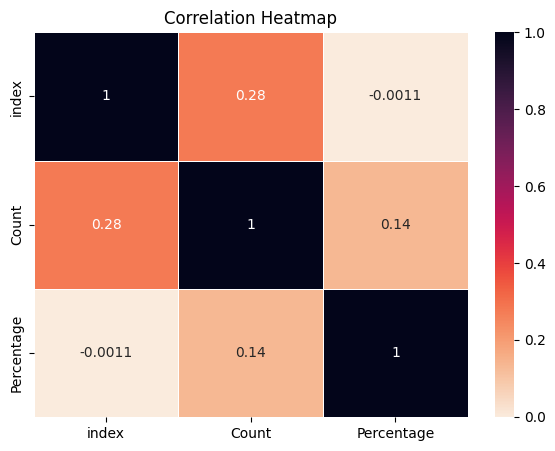

In [55]:
# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(data.corr(), annot=True, cmap='rocket_r', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

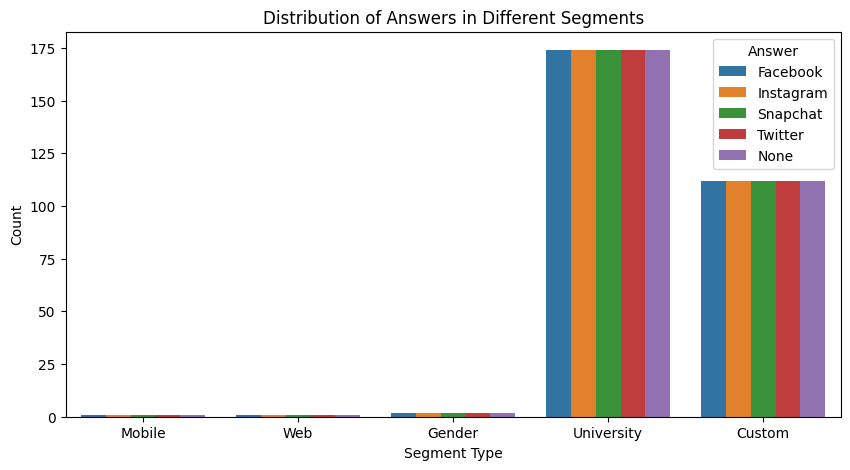

In [56]:
# Explore the dataset
# Distribution of answers in different segments
plt.figure(figsize=(10, 5))
sns.countplot(x='Segment Type', hue='Answer', data=data)
plt.title('Distribution of Answers in Different Segments')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.show()

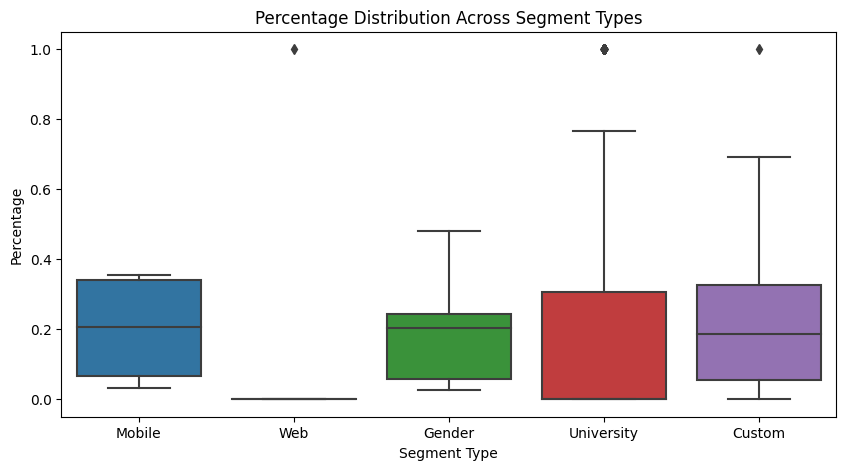

In [57]:
# Analyzing percentages
plt.figure(figsize=(10, 5))
sns.boxplot(x='Segment Type', y='Percentage', data=data)
plt.title('Percentage Distribution Across Segment Types')
plt.xlabel('Segment Type')
plt.ylabel('Percentage')
plt.show()

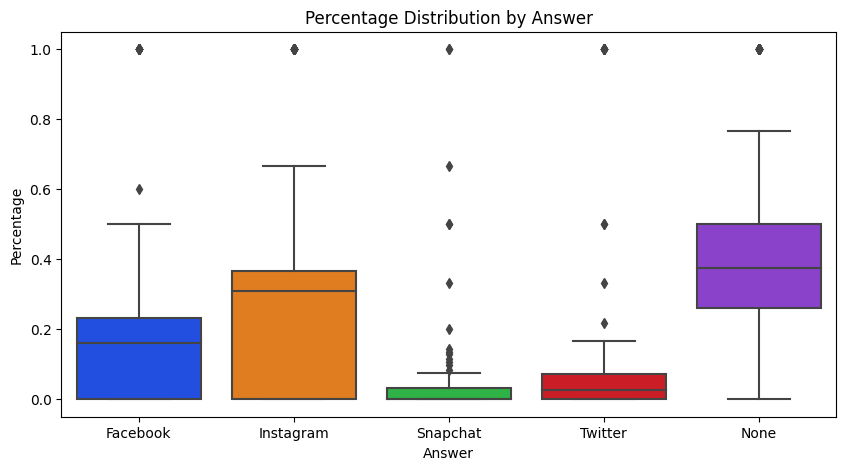

In [58]:
# Boxplot for Percentage by Answer
plt.figure(figsize=(10, 5))
sns.boxplot(x='Answer', y='Percentage', data=data, palette='bright')
plt.title('Percentage Distribution by Answer')
plt.xlabel('Answer')
plt.ylabel('Percentage')
plt.show()

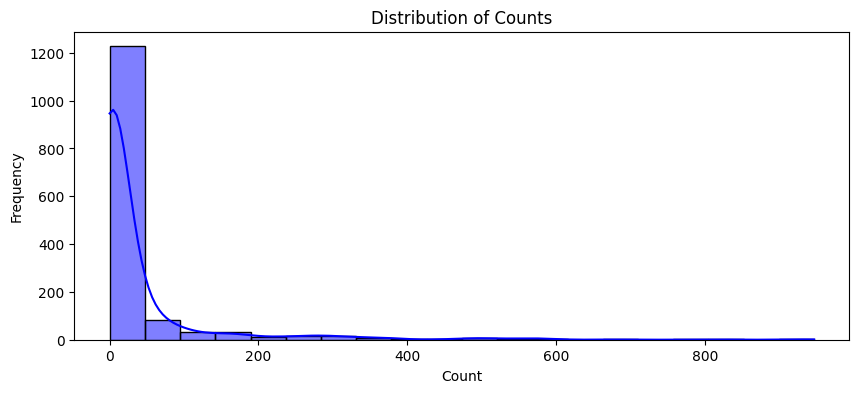

In [59]:
# Histogram for Count
plt.figure(figsize=(10, 4))
sns.histplot(data['Count'], bins=20, kde=True, color='blue')
plt.title('Distribution of Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Identify influential users based on counts or percentages
# Top users by Count
top_users_count = data.groupby('Segment Description')['Count'].sum().sort_values(ascending=False).head(10)
print("Top Users by Count:")
print(top_users_count)

Top Users by Count:
Segment Description
Global results                  2676
I'm in? College                 2325
you a virgin? No                1696
closely identify as? White      1572
What's your GPA? 3.0 to 4.0     1566
Male voters                     1562
clubs / organizations? No       1543
student loan debt? No           1528
Mac or PC? Mac 🖥                1457
Sexual orientation? Straight    1193
Name: Count, dtype: int64


In [61]:
# Top users by Percentage
top_users_percentage = data.groupby('Segment Description')['Percentage'].mean().sort_values(ascending=False).head(10)
print("\nTop Users by Percentage:")
print(top_users_percentage)


Top Users by Percentage:
Segment Description
I'm in? High School                     0.2004
I'm in? Post-grad                       0.2002
Are you single? No                      0.2002
closely identify as? Native American    0.2002
Sexual orientation? Confused            0.2002
Butler University                       0.2002
University of Missouri                  0.2002
closely identify as? White              0.2002
Claremont McKenna College               0.2002
you a virgin? Yes                       0.2002
Name: Percentage, dtype: float64


In [62]:
# Identify influential segments
influential_segments = data.groupby('Segment Type')['Percentage'].mean().sort_values(ascending=False).head(3)
print("\nInfluential Segments:")
print(influential_segments)



Influential Segments:
Segment Type
Mobile        0.200000
Web           0.200000
University    0.199992
Name: Percentage, dtype: float64


In [63]:
# Conclusion and insights
# Summary statistics or insights based on the analysis
average_percentage = data['Percentage'].mean()
print("\nAverage Percentage across the dataset:", average_percentage)



Average Percentage across the dataset: 0.19931310344827588


In [64]:
# Save insights to a text file
with open('/content/drive/My Drive/Projects/task5/insights.txt', 'w') as f:
    f.write(f"Average Percentage across the dataset: {average_percentage}\n")
    f.write("\nTop Users by Count:\n")
    f.write(str(top_users_count) + '\n')
    f.write("\nTop Users by Percentage:\n")
    f.write(str(top_users_percentage) + '\n')
    f.write("\nInfluential Segments:\n")
    f.write(str(influential_segments) + '\n')